# Using LayoutParser & Camelot

In [1]:
!pip install -U layoutparser

     |████████████████████████████████| 19.2 MB 1.2 MB/s 
     |████████████████████████████████| 636 kB 38.4 MB/s 
     |████████████████████████████████| 45 kB 3.7 MB/s 
     |████████████████████████████████| 5.6 MB 42.3 MB/s 
     |████████████████████████████████| 139 kB 50.2 MB/s 
     |████████████████████████████████| 1.9 MB 19.8 MB/s 
  Created wheel for pdfplumber: filename=pdfplumber-0.5.28-py3-none-any.whl size=32240 sha256=76f540fcf51e9d2ff9c0135d5b8f65c363d7d497ff40554746d207ec94c4568e
  Stored in directory: /root/.cache/pip/wheels/f2/b1/a0/c0a77b756d580f53b3806ae0e0b3ec945a8d05fca1d6e10cc1
Successfully built pdfplumber
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2'

  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.4) to /tmp/pip-install-k3fvwkuy/detectron2_764ea6af4828405e9176f02e02d46490
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-install-k3fvwkuy/detectron2_764ea6af4828405e9176f02e02d46490
  Running command git checkout -q 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
     |████████████████████████████████| 47 kB 2.5 MB/s 
     |████████████████████████████████| 74 kB 1.9 MB/s 
     |████████████████████████████████| 112 kB 10.9 MB/s 
  Created wheel for detectron2: filename=detectron2-0.4-cp37-cp37m-linux_x86_64.whl size=5479829 sha256=645e7d5b0b0c47befc053120c18ad65000457ffd1d155240b76778eda7ab9f64
  Stored in directory: /tmp/pip-ephem-wheel-cache-1ntqo4me/wheels/87/3f/26/dc45098d34763c9dc05ea3ab35c6dec6e9e8c16ac741efb741
  Created wheel for fvcore: filename=fvcore-0.1.3.post20210317-py3-none-any.whl size=58543 sha256=4326b76ac80f1974593449c7fb4853fa01780e73f5d11d1b68fab53af

In [3]:
!pip install layoutparser[ocr]

     |████████████████████████████████| 435 kB 2.8 MB/s 
  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14072 sha256=f5aaf9730d36ed482de7de38372f65efe232ff1e9ec9d6102b492b4dc76e74f8
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract


In [4]:
!git clone https://github.com/Layout-Parser/layout-parser.git

Cloning into 'layout-parser'...
remote: Enumerating objects: 1312, done.
remote: Counting objects: 100% (818/818), done.
remote: Compressing objects: 100% (448/448), done.
remote: Total 1312 (delta 469), reused 612 (delta 303), pack-reused 494
Receiving objects: 100% (1312/1312), 64.00 MiB | 25.57 MiB/s, done.
Resolving deltas: 100% (698/698), done.


In [5]:
%cd layout-parser/

/content/layout-parser


In [6]:
!pip install PyMuPDF
import fitz

     |████████████████████████████████| 6.4 MB 4.1 MB/s 


In [7]:
pdfPath = input('Enter PDF Path')
pageNumber = int(input('Enter Page Number'))

Enter PDF Path/content/keppel-corporation-limited-annual-report-2018.pdf
Enter Page Number69


In [8]:
doc = fitz.open(pdfPath)
page = doc.loadPage(pageNumber-1)
pix = page.getPixmap()
output = "outfile.png"
pix.writePNG(output)

In [9]:
import cv2
image = cv2.imread("/content/layout-parser/outfile.png")
image = image[..., ::-1]

config.yaml?dl=1: 8.19kB [00:02, 3.70kB/s]
model_final.pth?dl=1: 856MB [01:04, 13.2MB/s]                           
/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max

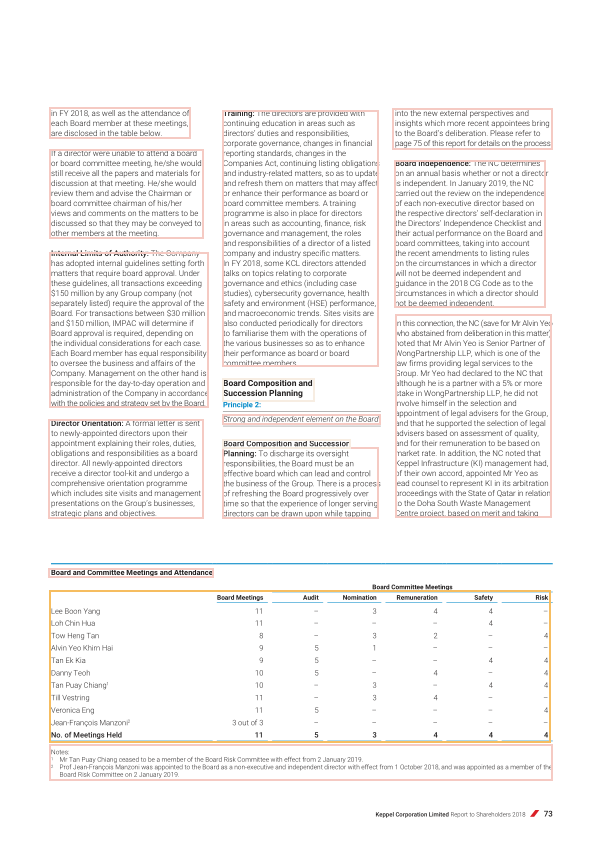

In [10]:
import layoutparser as lp
model = lp.Detectron2LayoutModel('lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config',extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.65],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})
layout = model.detect(image) 
lp.draw_box(image, layout,)

In [11]:
text_blocks = lp.Layout([b for b in layout if b.type=="Table"])
text_blocks

Layout(_blocks=[TextBlock(block=Rectangle(x_1=50.02735900878906, y_1=590.7916870117188, x_2=549.476806640625, y_2=742.76318359375), text=None, id=None, type=Table, parent=None, next=None, score=0.9792578816413879)], page_data={})

In [12]:
x1 = text_blocks._blocks[0].block.x_1
x2 = text_blocks._blocks[0].block.x_2
y1 = text_blocks._blocks[0].block.y_1
y2 = text_blocks._blocks[0].block.y_2


#Here I get the coordinates of the table but I'm not sure how to pass it to Camelot.

In [13]:
%cd

/root


In [14]:
!pip install "camelot-py[cv]" -q

     |████████████████████████████████| 40 kB 24 kB/s 
     |████████████████████████████████| 77 kB 2.6 MB/s 
     |████████████████████████████████| 5.6 MB 22.0 MB/s 
     |████████████████████████████████| 11.7 MB 18.4 MB/s 
     |████████████████████████████████| 3.5 MB 39.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdfplumber 0.5.28 requires pdfminer.six==20200517, but you have pdfminer-six 20201018 which is incompatible.


In [15]:
!apt-get install ghostscript

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono gsfonts libcupsfilters1 libcupsimage2
  libgs9 libgs9-common libijs-0.35 libjbig2dec0 poppler-data
Suggested packages:
  fonts-noto ghostscript-x poppler-utils fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 poppler-data
0 upgraded, 11 newly installed, 0 to remove and 37 not upgraded.
Need to get 14.1 MB of archives.
After this operation, 49.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 fonts-droid-fallback all 1:6.0.1r16-1.1 [1,805 kB]
Get:2 http://archive.ubuntu.com/ubuntu

In [16]:
import fitz
import pandas as pd
filename = 'results'

In [17]:
import camelot as cam

In [18]:
# table = cam.read_pdf("/content/keppel-corporation-limited-annual-report-2018.pdf", table_areas = ["{},{},{},{}".format(x1,y1,x2,y2)]  pages = '69', flavor = 'stream') This line does not work
table = cam.read_pdf("/content/keppel-corporation-limited-annual-report-2018.pdf",  pages = '69', flavor = 'stream')
table

<TableList n=2>

In [19]:
table[1].df

,0,1,2,3,4,5,6
0,Board and Committee Meetings and Attendance,,,,,,
1,,,,,Board Committee Meetings,,
2,,Board Meetings,Audit,Nomination,Remuneration,Safety,Risk
3,Lee Boon Yang,11,–,3,4,4,–
4,Loh Chin Hua,11,–,–,–,4,–
5,Tow Heng Tan,8,–,3,2,–,4
6,Alvin Yeo Khirn Hai,9,5,1,–,–,–
7,Tan Ek Kia,9,5,–,–,4,4
8,Danny Teoh,10,5,–,4,–,4
9,Tan Puay Chiang1,10,–,3,–,4,4


In [20]:
data_frame = table[1].df

In [21]:
%cd /content

/content


In [22]:
data_frame.to_excel(filename+".xlsx")

# Using Tabula

In [23]:
!pip install tabula-py

     |████████████████████████████████| 12.0 MB 4.1 MB/s 


In [24]:
from tabula import read_pdf
from tabulate import tabulate

pdfPath = input('Enter PDF Path')
pageNumber = int(input('Enter Page Number'))

Enter PDF Path/content/keppel-corporation-limited-annual-report-2018.pdf
Enter Page Number69


In [25]:
df = read_pdf(pdfPath, pages = pageNumber)
df

[   Board and Committee Meetings and Attendance  ... Unnamed: 4
 0                                          NaN  ...        NaN
 1                                          NaN  ...       Risk
 2                                Lee Boon Yang  ...          –
 3                                 Loh Chin Hua  ...          –
 4                                 Tow Heng Tan  ...          4
 5                          Alvin Yeo Khirn Hai  ...          –
 6                                   Tan Ek Kia  ...          4
 7                                   Danny Teoh  ...          4
 8                             Tan Puay Chiang1  ...          4
 9                                Till Vestring  ...          –
 10                                Veronica Eng  ...          4
 11                      Jean-François Manzoni2  ...          –
 12                        No. of Meetings Held  ...          4
 
 [13 rows x 6 columns]]

In [26]:
print(tabulate(df))

----------------------------------------------------------------  -------------------------------  -------------------------------  -------------------------------  -------------------------------  -------------------------------
0                        NaN                                      0                NaN             0       NaN                      0     Board Committee Meetings   0        NaN                     0      NaN
1                        NaN                                      1     Board Meetings             1     Audit                      1      Nomination Remuneration   1     Safety                     1     Risk
2              Lee Boon Yang                                      2                 11             2         –                      2                          3 4   2          4                     2        –
3               Loh Chin Hua                                      3                 11             3         –                      3          

In [27]:
import pandas as pd
finalDf = pd.DataFrame(df[0])


In [28]:
%cd /content/

/content


In [29]:
finalDf.to_excel("resultsTabula.xls")

In [30]:
!pip freeze > requirements.txt